In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

# Data preparation

In [2]:
df = pd.read_csv('https://rakamin-lms.s3.ap-southeast-1.amazonaws.com/vix-assets/idx-partners/loan_data_2007_2014.csv')

C:\Users\dito\AppData\Local\Temp\ipykernel_23988\34397417.py:1: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('https://rakamin-lms.s3.ap-southeast-1.amazonaws.com/vix-assets/idx-partners/loan_data_2007_2014.csv')


In [3]:
df.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

<Axes: >

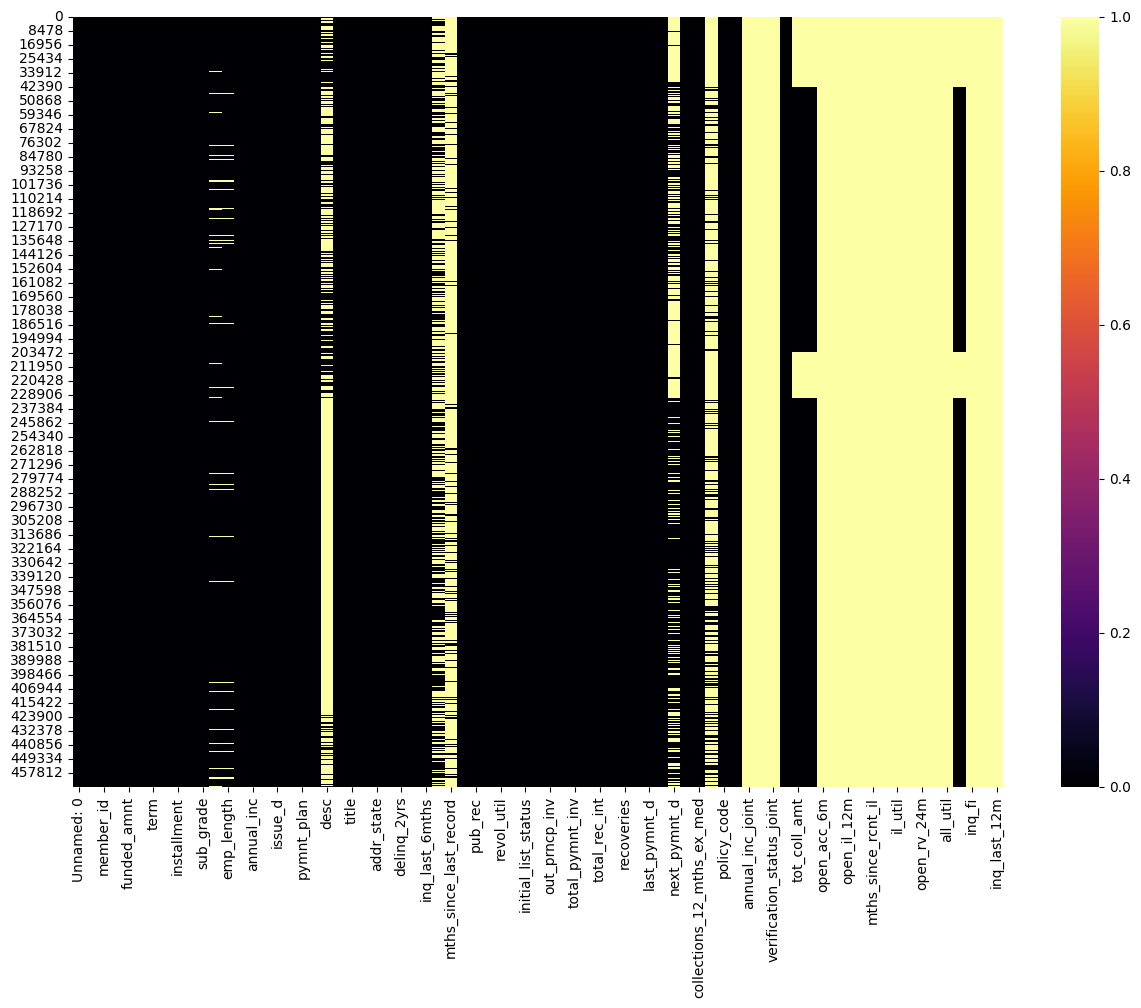

In [5]:
# Plot missing value
fig = plt.figure(figsize=(15,10))
sns.heatmap(df.isna(),cmap='inferno')

In [6]:
# Drop missing, duplicates, and unnecessary columns
df.drop_duplicates(inplace=True)
df.dropna(axis=1, inplace=True)
df.drop(columns=['Unnamed: 0', 'id', 'member_id', 'zip_code', 'url', 'issue_d', 'addr_state', 'policy_code', 'total_rec_int', 'application_type'], inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 25 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   loan_amnt                466285 non-null  int64  
 1   funded_amnt              466285 non-null  int64  
 2   funded_amnt_inv          466285 non-null  float64
 3   term                     466285 non-null  object 
 4   int_rate                 466285 non-null  float64
 5   installment              466285 non-null  float64
 6   grade                    466285 non-null  object 
 7   sub_grade                466285 non-null  object 
 8   home_ownership           466285 non-null  object 
 9   verification_status      466285 non-null  object 
 10  loan_status              466285 non-null  object 
 11  pymnt_plan               466285 non-null  object 
 12  purpose                  466285 non-null  object 
 13  dti                      466285 non-null  float64
 14  revo

In [8]:
df.purpose.sort_values().unique()

array(['car', 'credit_card', 'debt_consolidation', 'educational',
       'home_improvement', 'house', 'major_purchase', 'medical', 'moving',
       'other', 'renewable_energy', 'small_business', 'vacation',
       'wedding'], dtype=object)

In [9]:
# Unique values for each object column
#for column in df.columns:
#  if df[column].dtype == object:
#    print(column)
#    print(df[column].unique())

In [10]:
# Drop irrelevant loan_status
df = pd.DataFrame(df[df['loan_status'] != "Does not meet the credit policy. Status:Fully Paid"])
df = pd.DataFrame(df[df['loan_status'] != "Does not meet the credit policy. Status:Charged Off"])
df = pd.DataFrame(df[df['loan_status'] != "Issued"])
df = pd.DataFrame(df[df['loan_status'] != "In Grace Period"])

In [11]:
# Where loan_status is not Default change to other
df.loc[df['loan_status'] != 'Default', 'loan_status'] = 'Other'

# EDA

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 460390 entries, 0 to 466284
Data columns (total 25 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   loan_amnt                460390 non-null  int64  
 1   funded_amnt              460390 non-null  int64  
 2   funded_amnt_inv          460390 non-null  float64
 3   term                     460390 non-null  object 
 4   int_rate                 460390 non-null  float64
 5   installment              460390 non-null  float64
 6   grade                    460390 non-null  object 
 7   sub_grade                460390 non-null  object 
 8   home_ownership           460390 non-null  object 
 9   verification_status      460390 non-null  object 
 10  loan_status              460390 non-null  object 
 11  pymnt_plan               460390 non-null  object 
 12  purpose                  460390 non-null  object 
 13  dti                      460390 non-null  float64
 14  revol_bal

In [13]:
np.ceil(df.describe().transpose()[['min', 'max']].values).astype(int)

array([[    500,   35000],
       [    500,   35000],
       [      0,   35000],
       [      6,      27],
       [     16,    1410],
       [      0,      40],
       [      0, 2568995],
       [      0,   32161],
       [      0,   32161],
       [      0,   57778],
       [      0,   57778],
       [      0,   35001],
       [      0,     359],
       [      0,   33521],
       [      0,    7003],
       [      0,   36235]])

In [14]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
loan_amnt,460390.0,14336.414181,8284.001542,500.00,8000.0000,12000.000,20000.0000,3.500000e+04
funded_amnt,460390.0,14311.823508,8271.629904,500.00,8000.0000,12000.000,20000.0000,3.500000e+04
funded_amnt_inv,460390.0,14257.001123,8284.042408,0.00,8000.0000,12000.000,19975.0000,3.500000e+04
int_rate,460390.0,13.813670,4.362226,5.42,10.9900,13.650,16.4900,2.606000e+01
installment,460390.0,432.523158,243.348778,15.69,257.0500,380.560,567.0400,1.409990e+03
dti,460390.0,17.226133,7.848467,0.00,11.3700,16.870,22.7900,3.999000e+01
revol_bal,460390.0,16167.006829,20212.716868,0.00,6434.0000,11780.000,20329.0000,2.568995e+06
out_prncp,460390.0,4402.424087,6347.621336,0.00,0.0000,427.825,7323.5000,3.216038e+04
out_prncp_inv,460390.0,4400.814953,6345.737287,0.00,0.0000,427.545,7320.0600,3.216038e+04
total_pymnt,460390.0,11562.683901,8276.869332,0.00,5564.7800,9435.845,15334.0550,5.777758e+04


<Axes: xlabel='loan_status', ylabel='count'>

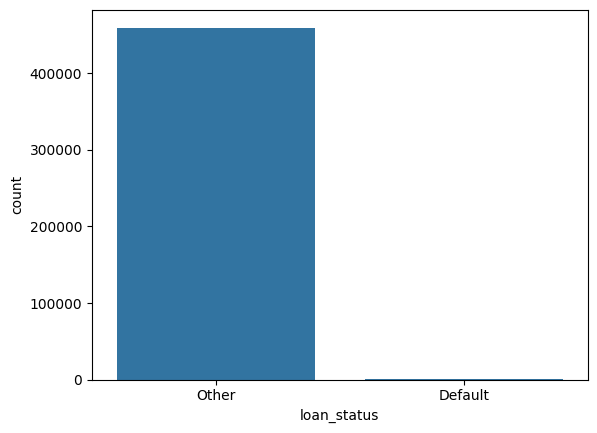

In [15]:
sns.barplot(df['loan_status'].value_counts())

ValueError: could not convert string to float: ' 36 months'

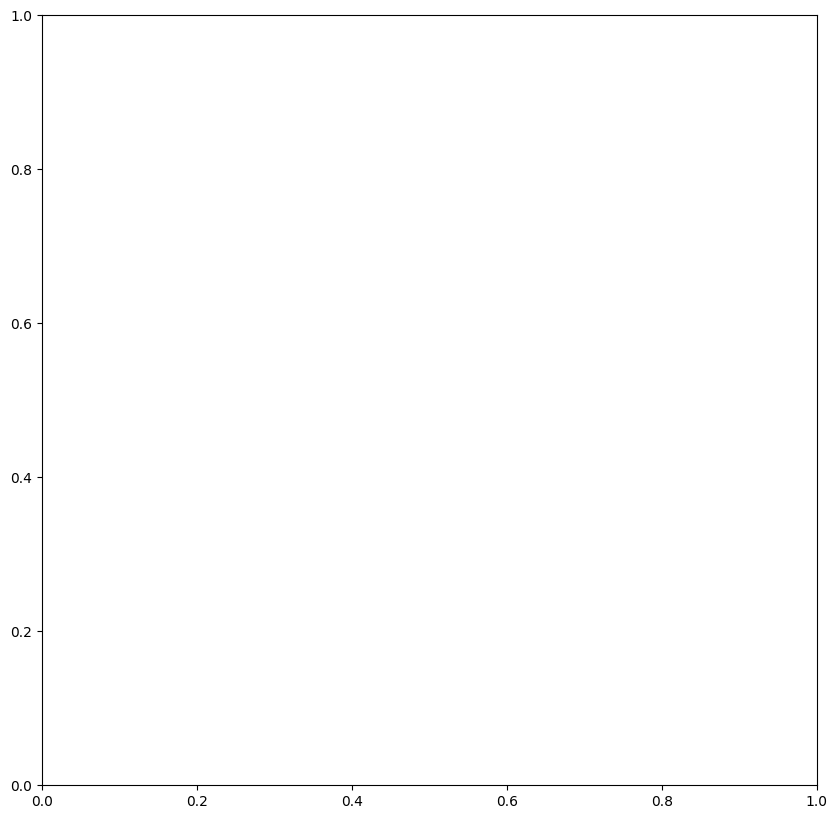

In [16]:
# Heatmap for numeric columns
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df.corr().round(2), annot=True, cmap='inferno')

In [ ]:
df.loan_status.value_counts()

Other      459558
Default       832
Name: loan_status, dtype: int64

<ipython-input-245-cbac89ba709d>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(6, 6))


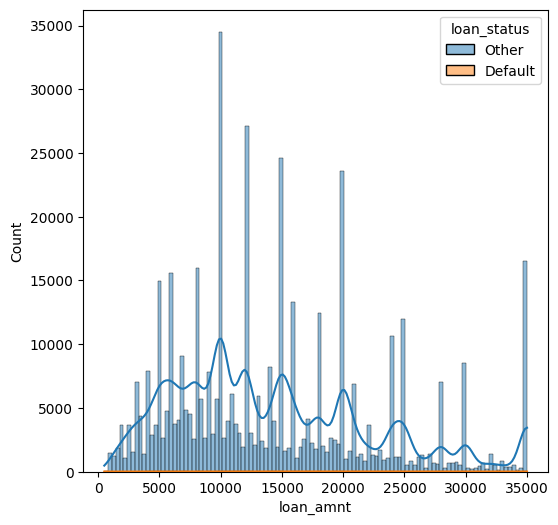

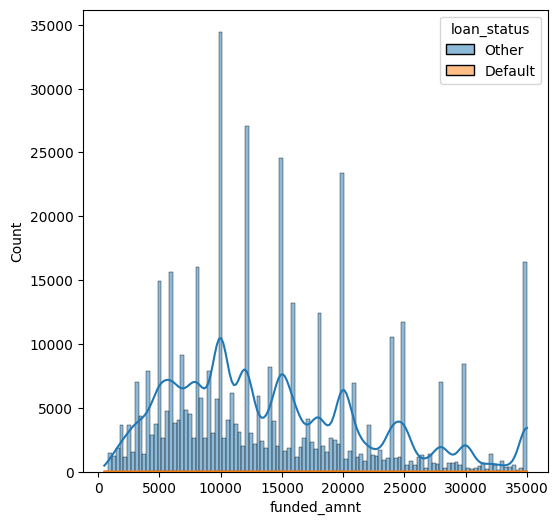

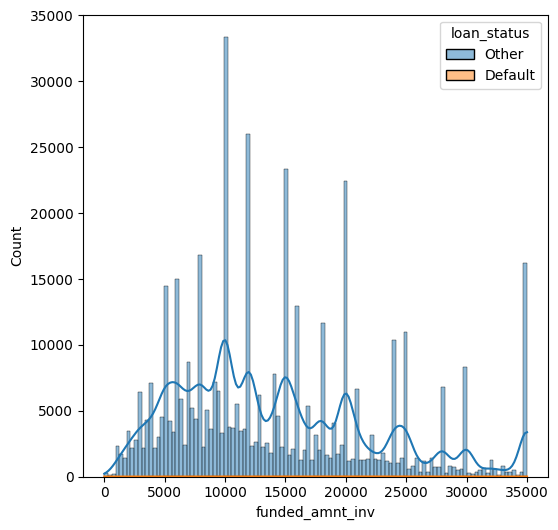

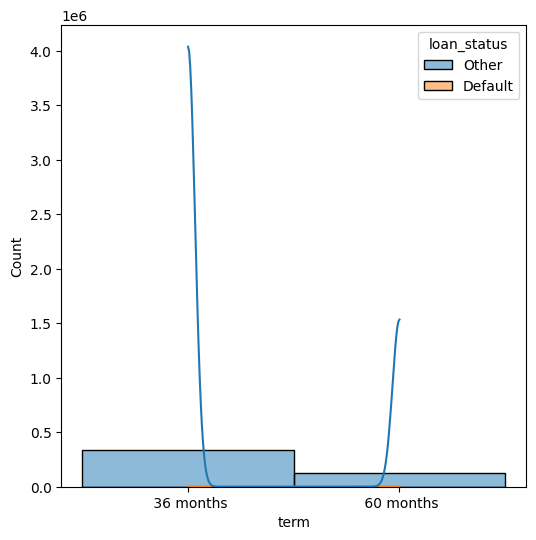

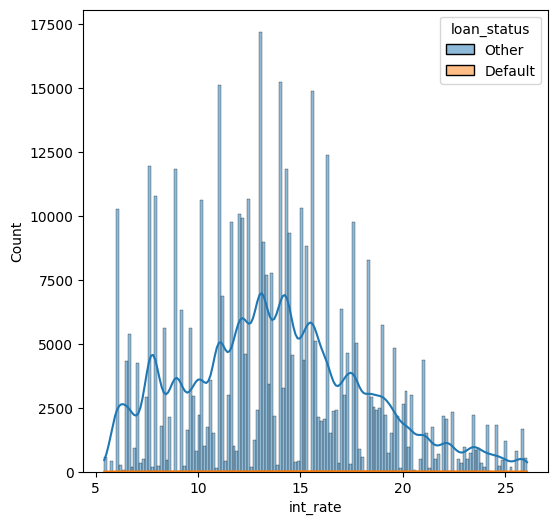

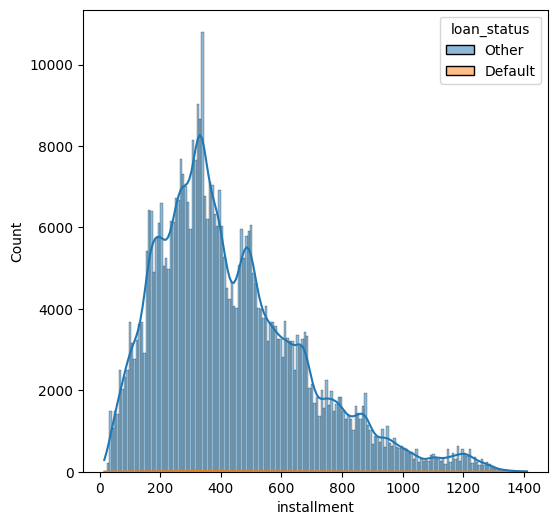

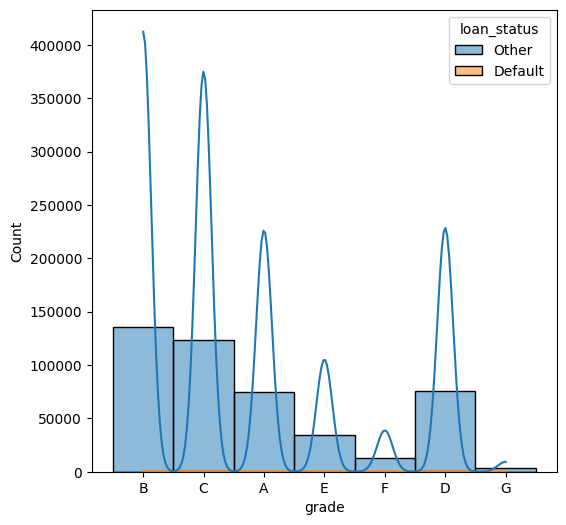

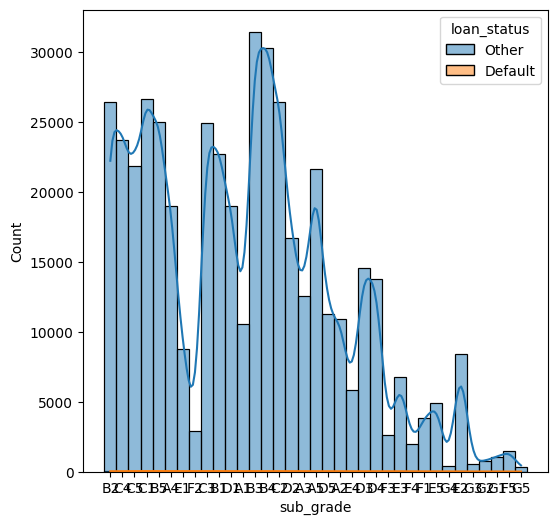

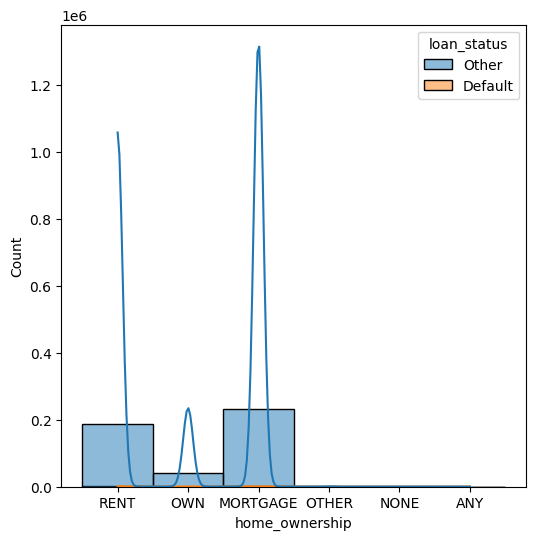

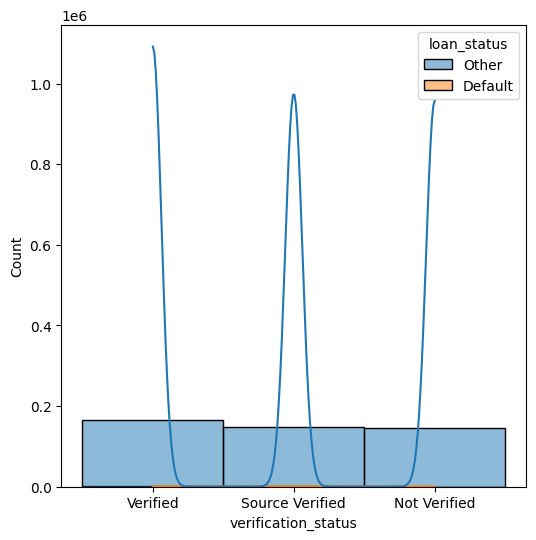

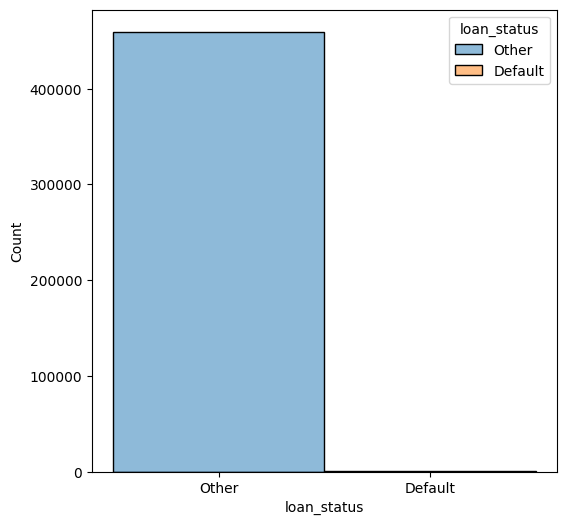

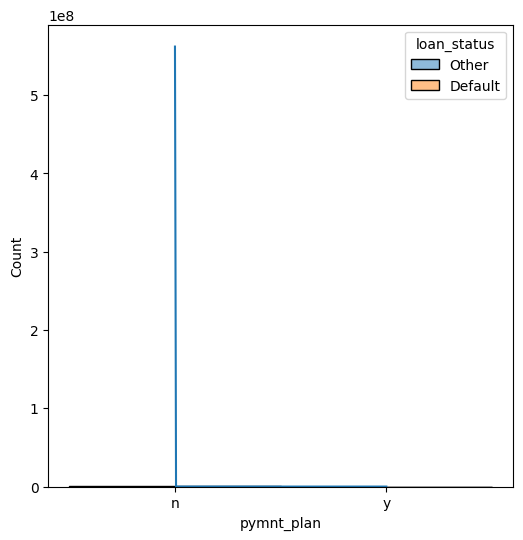

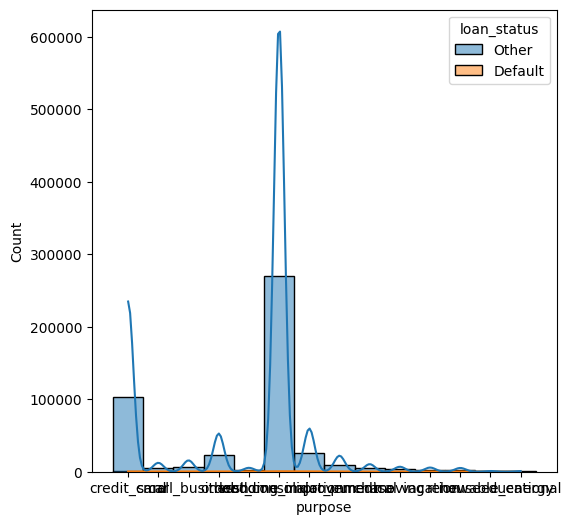

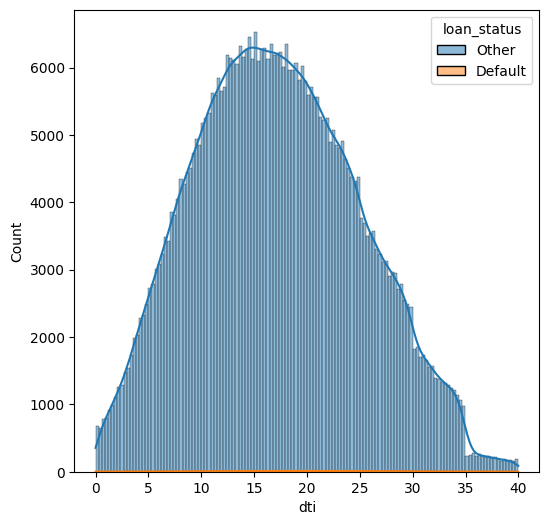

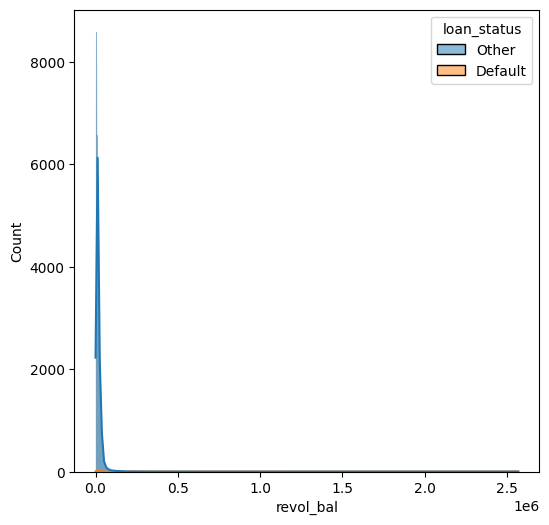

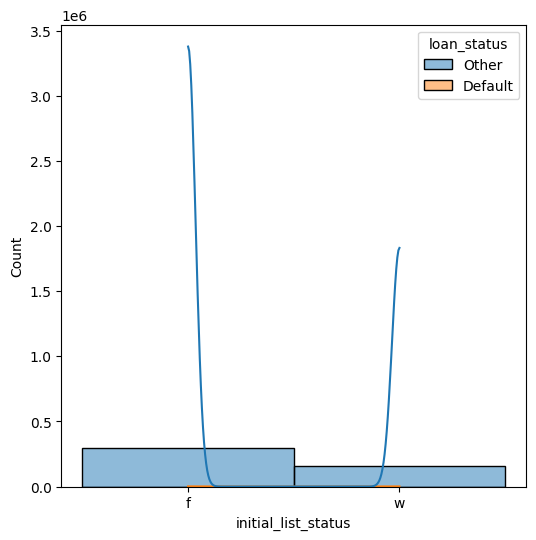

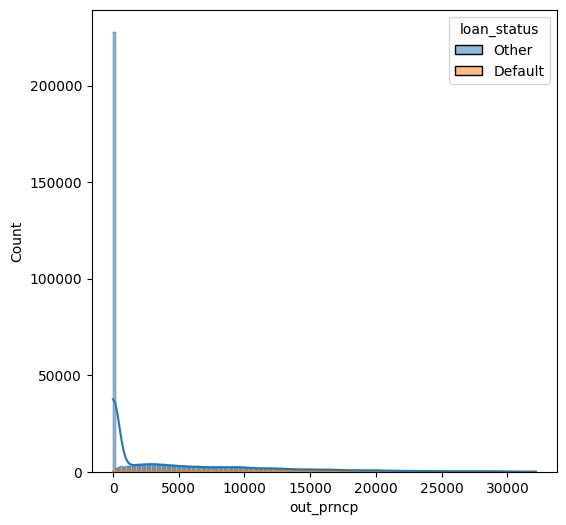

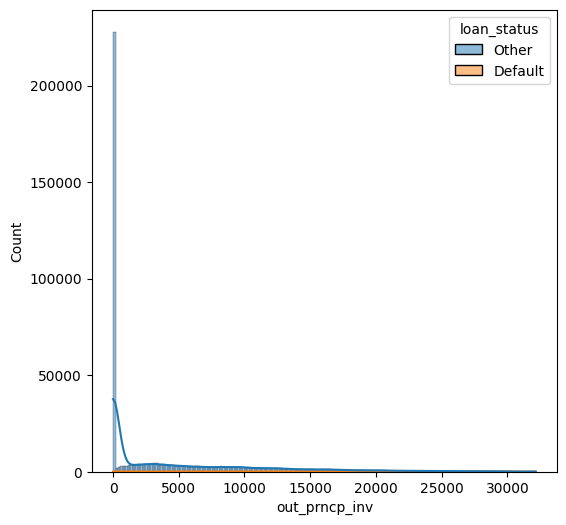

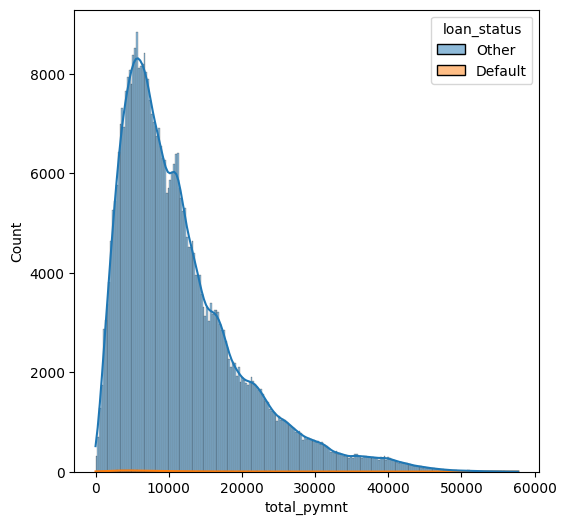

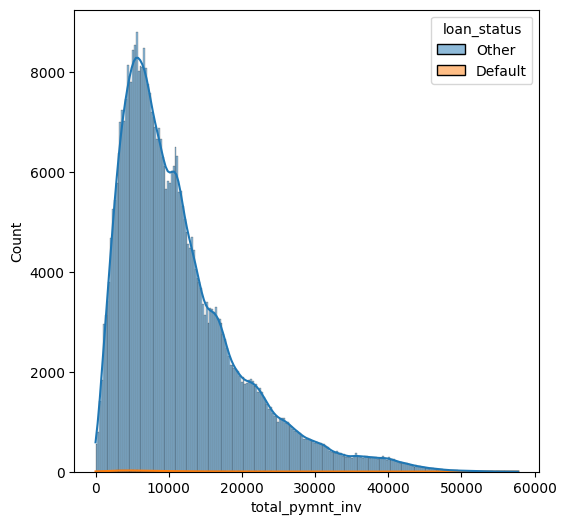

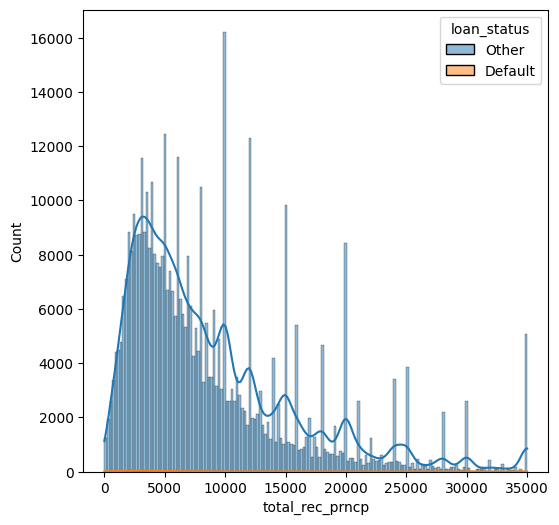

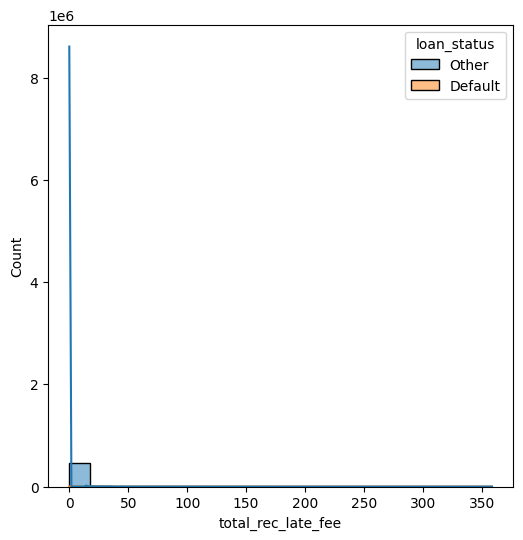

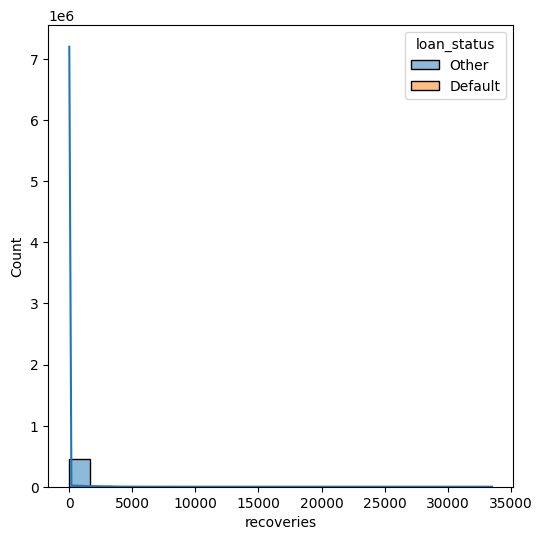

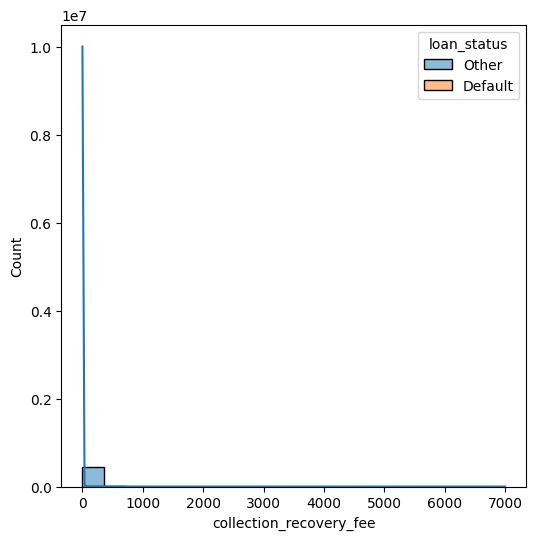

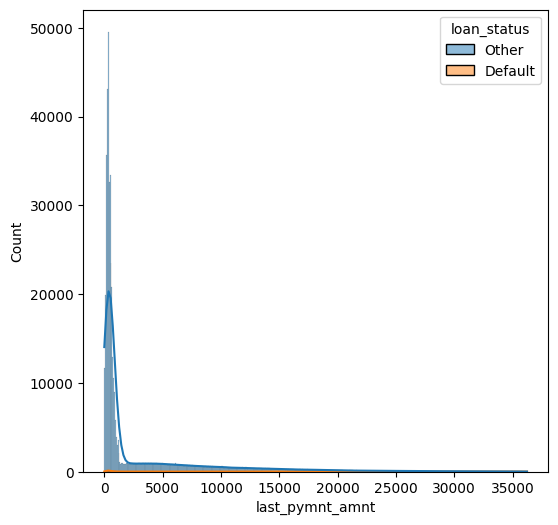

In [ ]:
for column in df.columns:
  plt.figure(figsize=(6, 6))
  sns.histplot(df, x = column, hue = "loan_status", kde=True)
  print('')



*   Data is very imbalanced
*   Many features are skewed



# Data Processing


In [ ]:
# Scale features
from sklearn.preprocessing import PowerTransformer

numeric = df.select_dtypes(exclude=['object']).columns.values
pt = PowerTransformer(method='yeo-johnson', standardize=True)

df[numeric] = pt.fit_transform(df[numeric])

In [ ]:
# X y split
X = df.drop(columns=['loan_status'])
y = df['loan_status']

In [ ]:
# Encode
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder

obj = X.select_dtypes(include=['object']).columns.values
#X[obj] = X[obj].astype('category')
#X = pd.get_dummies(X)

enc = OrdinalEncoder()
X[obj] = enc.fit_transform(X[obj])

le = LabelEncoder()
y = le.fit_transform(y)
print(dict(zip(le.classes_, le.transform(le.classes_))))

{'Default': 0, 'Other': 1}


In [ ]:
# Train test split

from sklearn.model_selection import train_test_split
X, X_test, y, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Imbalance Data
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SVMSMOTE

rus = RandomUnderSampler(random_state=42, sampling_strategy=0.1)
X_res, y_res = rus.fit_resample(X, y)

X_res = X_res.astype('float64')

sm = SVMSMOTE(random_state=42, sampling_strategy=0.5)
X_res, y_res = sm.fit_resample(X_res, y_res)

In [ ]:
pd.DataFrame(y_res).value_counts()

1    6480
0    3240
dtype: int64

In [ ]:
# X_res to values

X_res = X_res.values

# Model

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, accuracy_score, precision_score, recall_score

In [ ]:
cv_scores = []
baselines = []
precision_scores = []
recall_scores = []

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for train_index, test_index in skf.split(X_res, y_res):
    clf = RandomForestClassifier(n_estimators=50)

    # Baseline
    y_based = np.full_like(y_res[test_index], fill_value=1)
    baseline = accuracy_score(y_res[test_index], y_based)
    baselines.append(baseline)

    print(f'Baseline is: {baseline}')

    # Fit-predict
    clf.fit(X_res[train_index], y_res[train_index])
    y_pred = clf.predict(X_res[test_index])

    # Mesaure accuracy
    acc = accuracy_score(y_res[test_index], y_pred)
    acc = accuracy_score(y_res[test_index], y_pred)
    prec = precision_score(y_res[test_index], y_pred)
    rec = recall_score(y_res[test_index], y_pred)

    cv_scores.append(acc)
    precision_scores.append(prec)
    recall_scores.append(rec)

    print(f'Accuracy: {acc}, Precision: {prec}, Recall: {rec} \n')

# Evaluate the model
average_baseline = sum(baselines) / len(baselines)
average_accuracy = sum(cv_scores) / len(cv_scores)
average_precision = sum(precision_scores) / len(precision_scores)
average_recall = sum(recall_scores) / len(recall_scores)

print("Average Baseline: {:.2%}".format(average_baseline))
print("Average Accuracy: {:.2%}".format(average_accuracy))
print("Average Precision: {:.2%}".format(average_precision))
print("Average Recall: {:.2%}".format(average_recall))

Baseline is: 0.6666666666666666
Accuracy: 0.933641975308642, Precision: 0.933184855233853, Recall: 0.9699074074074074 

Baseline is: 0.6666666666666666
Accuracy: 0.9377572016460906, Precision: 0.9481311975591151, Recall: 0.9591049382716049 

Baseline is: 0.6666666666666666
Accuracy: 0.9362139917695473, Precision: 0.9425981873111783, Recall: 0.9629629629629629 

Baseline is: 0.6666666666666666
Accuracy: 0.9362139917695473, Precision: 0.9412650602409639, Recall: 0.9645061728395061 

Baseline is: 0.6666666666666666
Accuracy: 0.941358024691358, Precision: 0.9525267993874426, Recall: 0.9598765432098766 

Average Baseline: 66.67%
Average Accuracy: 93.70%
Average Precision: 94.35%
Average Recall: 96.33%


In [ ]:
# Test on test dataset

# Baseline
y_based = np.full_like(y_test, fill_value=1)
baseline = accuracy_score(y_test, y_based)
print(f'Baseline is: {baseline}')

# Prediction
y_pred_test = clf.predict(X_test.values)
acc_test = accuracy_score(y_test, y_pred_test)
prec_test = precision_score(y_test, y_pred_test)
rec_test = recall_score(y_test, y_pred_test)

print(f'Accuracy on test dataset is: {acc_test}')
print(f'Precision on test dataset is: {prec_test}')
print(f'Recall on test dataset is: {rec_test}')

Baseline is: 0.9980016942157736
Accuracy on test dataset is: 0.9579595560285845
Precision on test dataset is: 0.9988665087335502
Recall on test dataset is: 0.9589635884823818


In [ ]:
import joblib

joblib.dump(clf, 'clf.joblib')
joblib.dump(pt, 'pt.joblib')
joblib.dump(enc, 'enc.joblib')

['enc.joblib']

In [ ]:
!pip list

Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
aiohttp                          3.9.1
aiosignal                        1.3.1
alabaster                        0.7.16
albumentations                   1.3.1
altair                           4.2.2
anyio                            3.7.1
appdirs                          1.4.4
argon2-cffi                      23.1.0
argon2-cffi-bindings             21.2.0
array-record                     0.5.0
arviz                            0.15.1
astropy                          5.3.4
astunparse                       1.6.3
async-timeout                    4.0.3
atpublic                         4.0
attrs                            23.2.0
audioread                        3.0.1
autograd                         1.6.2
Babel                            2.14.0
backcall                         0.2.0
beautifulsoup4                   4.11.2
bidict                           0.22.1
b